# Linear Regression Final Iteration using sklearn LinearRegression

In [1]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

py.init_notebook_mode(connected=True)

In [3]:
X_train = pd.read_csv("2_Output/2_test_train_encoded/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/2_test_train_encoded/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/2_test_train_encoded/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/2_test_train_encoded/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [107]:
X_train.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,12541,18,0,49,4,950,1,0,1,0
1,33964,58,2,3,12,879,1,0,1,0
2,7727,10,14,39,6,751,1,1,0,0
3,22162,23,6,9,7,788,1,0,0,1
4,35052,88,20,4,23,571,0,0,0,1


In [5]:
X_train_3 = X_train.iloc[:,[1,2,3,4,5]]
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


In [9]:
X_test_3 = X_test.iloc[:,[1,2,3,4,5]]
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,11,0,0,11,528
1,13,3,0,7,154
2,16,5,108,11,2104
3,35,0,0,3,182
4,1,4,14,2,358


# Check for MultiColinearity

In [183]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [184]:
calc_vif(X_train_3)

,variables,VIF
0,KSI,4.846622
1,TotalYouthServices,3.228883
2,CommunityHousing,1.465892
3,PlacesOfWorship,3.492141
4,SocialHousing,3.612535


In [22]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, r2_score
from numpy import percentile
from scipy import stats
import statsmodels.api as sm

In [45]:
def linReg (X_train,y_train,X_test, y_test):

# intantiate and fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    #print("Intercept:",lr.intercept_)
    coeff = lr.coef_
    
    # making predictions
    y_pred_test = lr.predict(X_test)
    
    # metrics of performance
    mse_ = mean_squared_error(y_test, y_pred_test)
    r2_ = r2_score(y_test, y_pred_test)
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # print mse, r2
    print("MSE = ", mse_)
    print("R2 = ", r2_)
    print('Mean Absolute Error', mae)
    
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    coef_table.insert(len(coef_table.columns),"Coefs",coeff.transpose())
  
    # Print Coefficient table
    params = np.append(lr.intercept_,lr.coef_)
    
    newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))

    var_b = mse_*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(newX.shape[0]- newX.shape[1]))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    features = ["constan","KSI", "TotalYouthServices", "CommunityHousing", "PlacesOfWorship", "SocialHousing"   ]
    
    myDF3 = pd.DataFrame()
    myDF3["bias"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [features,params,sd_b,ts_b,p_values]
    print(myDF3)  
    
    print("============================================")

      
    #Errors
    diff = (y_test - y_pred_test)
    
    #pd.DataFrame(diff).to_csv("2_Output/4_mse/LR_TheftOver_errors.csv")
    
    # Plot histogram and adjust style
    plt.hist(diff, edgecolor='black', linewidth=1.2)
    plt.title("Errors Histogram")
    plt.ylabel('Number of Neighbourhoods')
    plt.xlabel('y-y^')
    
    # identify outliers with interquartile range
    data = diff
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    print("============================================")
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in np.array(data) if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in np.array(data) if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("============================================")
    
    
    # give me the coefficients and intercept
    coefficients_ = lr.coef_
    intercept_ = lr.intercept_
    
    #print("Coefficients = ", coefficients_)
    #print("Bias = ", intercept_)
 

    print('Predictions', y_pred_test)
    print("Errors",diff)
    
    print("============================================")
    # KFold cross_validate
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    # Kfold CV
    kf = KFold(n_splits=10, shuffle=True, random_state=24)
    cval_score = cross_validate(lr,X_train, y_train, cv=kf,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score['train_r2'])
    print('10-KFold folds:',kf)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score['test_neg_mean_squared_error'])), cval_score['test_neg_mean_squared_error'])
    plt.title('10-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score['test_neg_mean_squared_error']) + 1), \
             [cval_score['test_neg_mean_squared_error'].mean()] * (len(cval_score['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    kf5 = KFold(n_splits=5, shuffle=True, random_state=24)
    cval_score5 = cross_validate(lr,X_train, y_train, cv=kf5,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score5['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score5['train_r2'])
    print('5-Fold folds:',kf5)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score5['test_neg_mean_squared_error'])), cval_score5['test_neg_mean_squared_error'])
    plt.title('5-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score5['test_neg_mean_squared_error']) + 1), \
             [cval_score5['test_neg_mean_squared_error'].mean()] * (len(cval_score5['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_test)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    #p1 = max(max(y_pred_test), max(y_test)) #test
    #p2 = min(min(y_pred_test), min(y_test))  #test
    #plt.plot([p1, p2], [p1, p2], 'b-') #test 
    
    plt.tight_layout()
    

    
    return


In [12]:
X_train = pd.read_csv("2_Output/3_test_train_No_TOD/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/3_test_train_No_TOD/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/3_test_train_No_TOD/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/3_test_train_No_TOD/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [19]:
X_test_3 = X_test.iloc[:,[1,2,3,4,5]]
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,11,0,0,11,528
1,13,3,0,7,154
2,16,5,108,11,2104
3,35,0,0,3,182
4,1,4,14,2,358


In [14]:
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0


In [20]:
X_train_3 = X_train.iloc[:,[1,2,3,4,5]]
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


In [38]:
y_train

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,610,64,390,123,31
1,608,97,170,123,35
2,1077,283,303,247,26
3,794,52,409,147,48
4,453,54,168,117,28
...,...,...,...,...,...
93,506,69,170,145,22
94,1186,376,561,202,82
95,386,73,241,159,26
96,2292,276,628,501,82


In [39]:
import sklearn
print(sklearn.__version__)

0.22.1


MSE =  145516.186637488
R2 =  0.33542490890337906
Mean Absolute Error 287.27590394118687
                 bias  Coefficients  Standard Errors  t values  Probabilities
0             constan      147.4236           74.473     1.980          0.051
1                 KSI        9.6564            1.457     6.629          0.000
2  TotalYouthServices       38.4665            4.470     8.606          0.000
3    CommunityHousing       -0.0792            1.416    -0.056          0.956
4     PlacesOfWorship      -20.6414            6.799    -3.036          0.003
5       SocialHousing        0.2028            0.080     2.536          0.013
Percentiles: 25th=-238.260, 75th=94.817, IQR=333.077
Identified outliers: 5
Non-outlier observations: 37
Predictions [[ 133.65269838]
 [ 275.09327323]
 [ 685.28930854]
 [ 460.37802633]
 [ 341.14775957]
 [1261.2349408 ]
 [ 696.63960492]
 [ 466.16039419]
 [1207.80216209]
 [ 984.79245908]
 [ 660.2607335 ]
 [1403.37722389]
 [ 656.96043134]
 [ 852.19245513]
 [ 981.071

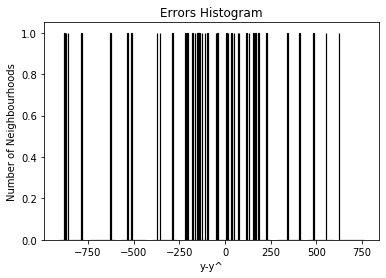

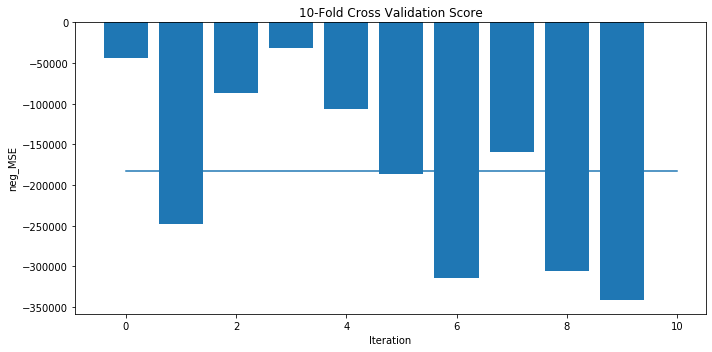

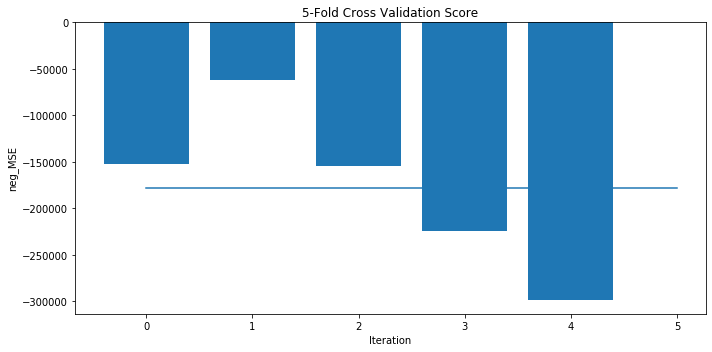

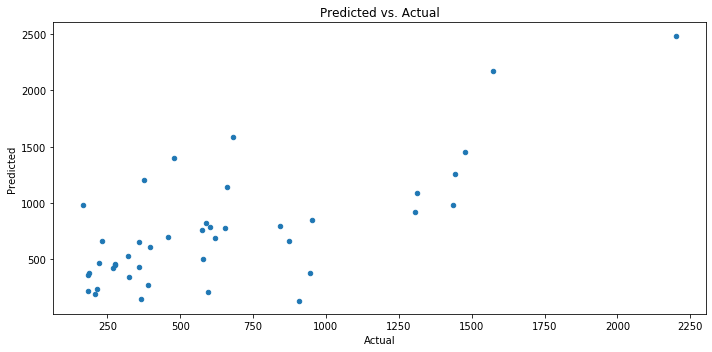

In [25]:
Assault_sklearn = linReg(X_train_3, y_train.iloc[:,[0]], X_test_3, y_test.iloc[:,[0]] )

MSE =  18818.874583643377
R2 =  -3.4776861252402016
Mean Absolute Error 95.20127948524248
                 bias  Coefficients  Standard Errors  t values  Probabilities
0             constan      -54.5913           26.782    -2.038          0.044
1                 KSI        2.9866            0.524     5.701          0.000
2  TotalYouthServices       -2.6147            1.607    -1.627          0.107
3    CommunityHousing       -0.4832            0.509    -0.949          0.345
4     PlacesOfWorship       14.8968            2.445     6.092          0.000
5       SocialHousing       -0.0226            0.029    -0.786          0.434
Percentiles: 25th=-62.604, 75th=60.481, IQR=123.086
Identified outliers: 3
Non-outlier observations: 39
Predictions [[130.19962253]
 [ 77.18981602]
 [ 44.27424903]
 [ 90.51988346]
 [-47.12116447]
 [323.49067035]
 [188.25079923]
 [126.63532319]
 [158.77442595]
 [403.42708973]
 [173.66210482]
 [409.00668411]
 [ -5.48678776]
 [ 33.53573984]
 [-19.07351375]
 [  8.94

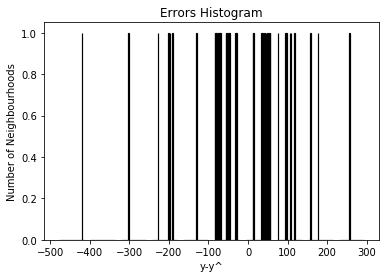

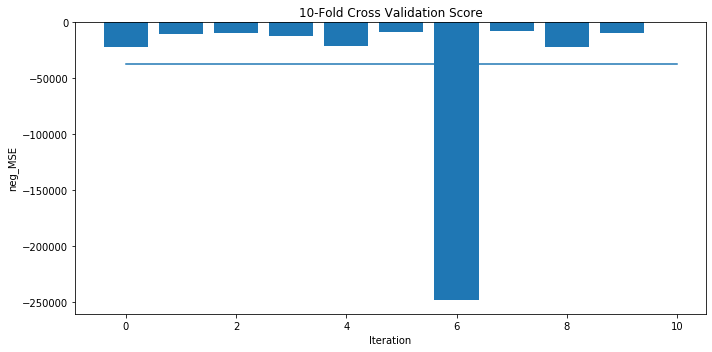

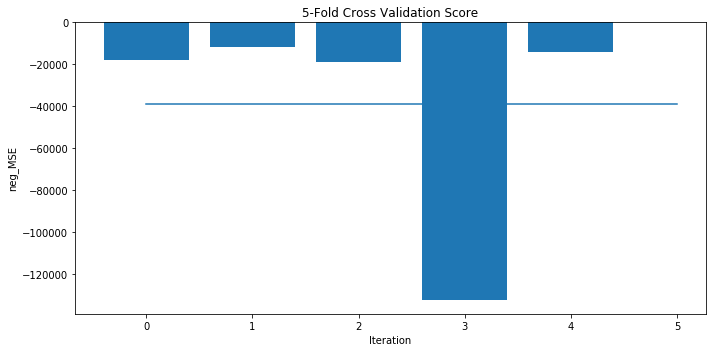

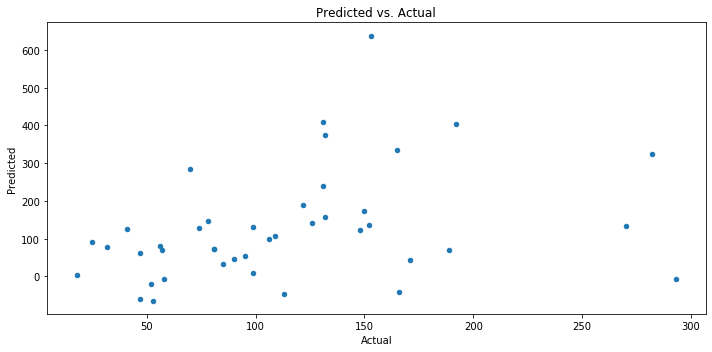

In [26]:
AutoTHeft_sklearn = linReg(X_train_3, y_train.iloc[:,[1]], X_test_3, y_test.iloc[:,[1]] )

MSE =  14377.204691253804
R2 =  0.6051335021673229
Mean Absolute Error 96.52148720135463
                 bias  Coefficients  Standard Errors  t values  Probabilities
0             constan       98.3252           23.409     4.200          0.000
1                 KSI        3.2133            0.458     7.018          0.000
2  TotalYouthServices        7.8725            1.405     5.604          0.000
3    CommunityHousing       -1.1761            0.445    -2.643          0.010
4     PlacesOfWorship        0.6046            2.137     0.283          0.778
5       SocialHousing        0.0324            0.025     1.290          0.200
Percentiles: 25th=-92.734, 75th=51.708, IQR=144.442
Identified outliers: 1
Non-outlier observations: 41
Predictions [[157.43540433]
 [172.93910237]
 [136.92879931]
 [218.50295951]
 [129.37603168]
 [472.80076977]
 [306.54705789]
 [233.5900187 ]
 [411.35603639]
 [420.21952368]
 [294.10720308]
 [542.63459862]
 [225.76379704]
 [249.36783996]
 [300.4725112 ]
 [247.565

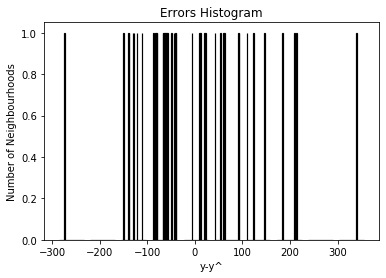

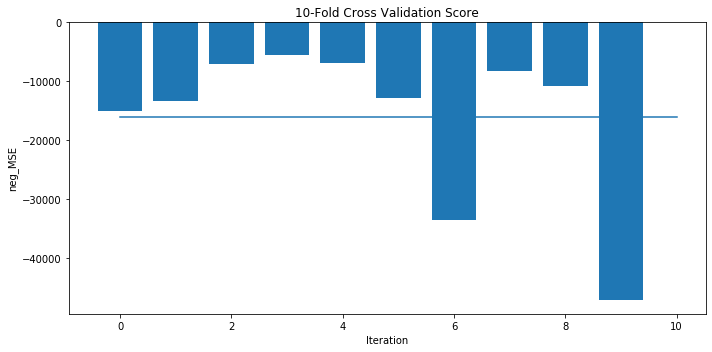

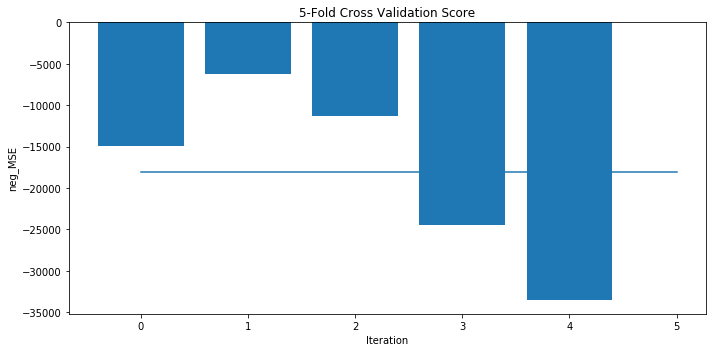

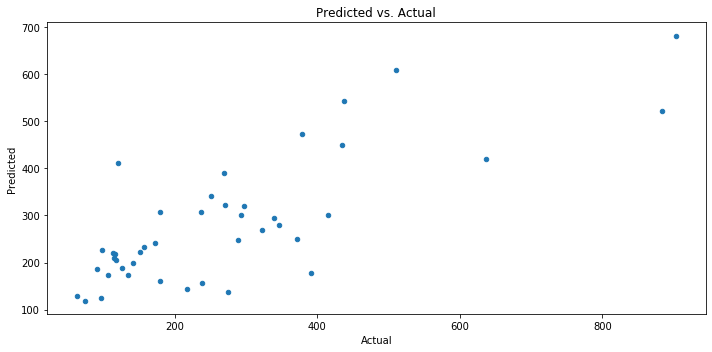

In [27]:
BreakandEnter_sklearn = linReg(X_train_3, y_train.iloc[:,[2]], X_test_3, y_test.iloc[:,[2]] )

MSE =  7028.044164841629
R2 =  0.08689321933024441
Mean Absolute Error 63.00364718897237
                 bias  Coefficients  Standard Errors  t values  Probabilities
0             constan       17.0861           16.367     1.044          0.299
1                 KSI        1.0526            0.320     3.288          0.001
2  TotalYouthServices        7.3678            0.982     7.501          0.000
3    CommunityHousing        0.0567            0.311     0.182          0.856
4     PlacesOfWorship        0.9061            1.494     0.606          0.546
5       SocialHousing        0.0380            0.018     2.164          0.033
Percentiles: 25th=-53.983, 75th=15.790, IQR=69.773
Identified outliers: 5
Non-outlier observations: 37
Predictions [[ 58.7081135 ]
 [ 65.07193966]
 [166.85360612]
 [ 63.56593391]
 [ 63.82762004]
 [238.85166138]
 [107.50088875]
 [ 88.16686099]
 [227.05243628]
 [263.9830362 ]
 [104.62476502]
 [253.86149027]
 [117.50269505]
 [163.98988222]
 [172.10105426]
 [152.3763

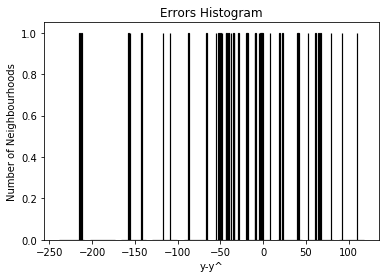

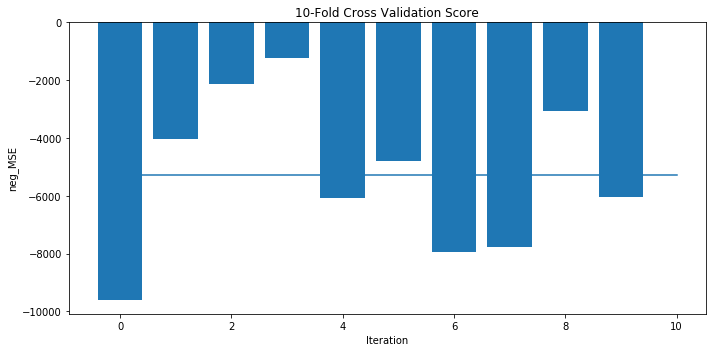

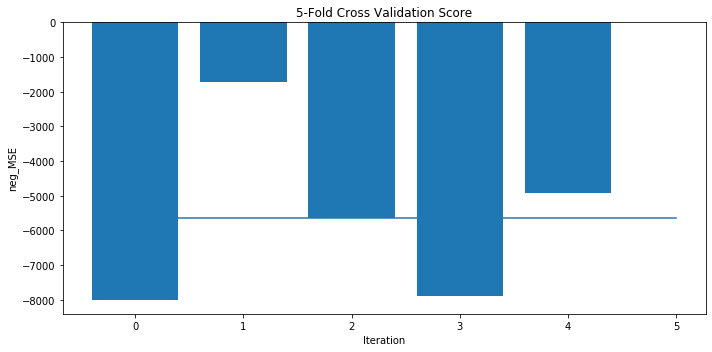

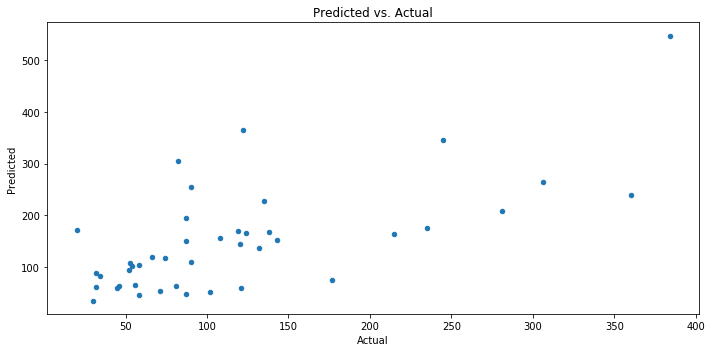

In [28]:
Robbery_sklearn = linReg(X_train_3, y_train.iloc[:,[3]], X_test_3, y_test.iloc[:,[3]] )

MSE =  871.8353956889533
R2 =  0.27398771189302307
Mean Absolute Error 23.02476811658314
                 bias  Coefficients  Standard Errors  t values  Probabilities
0             constan       -4.8347            5.765    -0.839          0.404
1                 KSI        0.9870            0.113     8.754          0.000
2  TotalYouthServices        2.3263            0.346     6.724          0.000
3    CommunityHousing       -0.2530            0.110    -2.309          0.023
4     PlacesOfWorship        0.4067            0.526     0.773          0.442
5       SocialHousing       -0.0146            0.006    -2.352          0.021
Percentiles: 25th=-16.488, 75th=16.959, IQR=33.448
Identified outliers: 1
Non-outlier observations: 41
Predictions [[  2.81214153]
 [ 15.58131245]
 [-30.88102008]
 [ 28.28233959]
 [ -2.48106201]
 [100.42147532]
 [ 56.96404375]
 [ 35.51648156]
 [ 83.06726292]
 [ 73.07878507]
 [ 56.26181253]
 [126.23725471]
 [ 14.24267094]
 [  9.19499286]
 [ 54.99293007]
 [ 30.0419

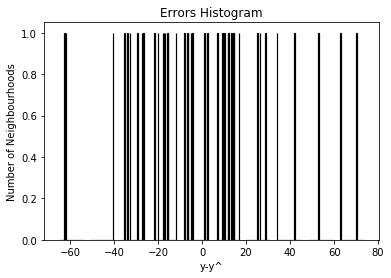

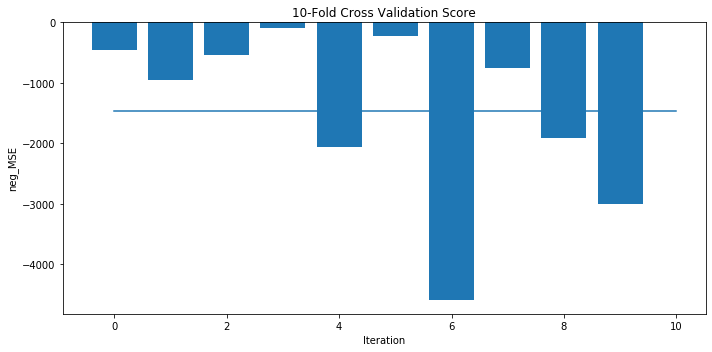

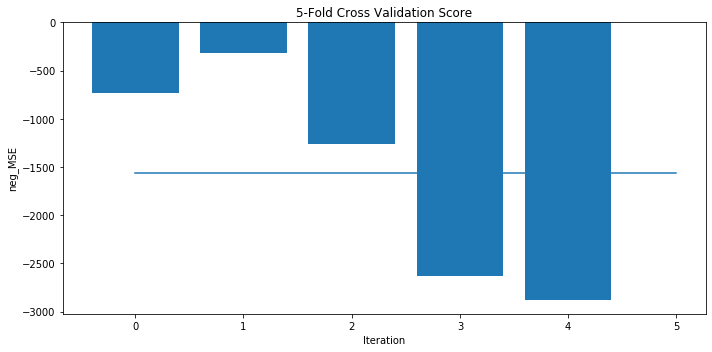

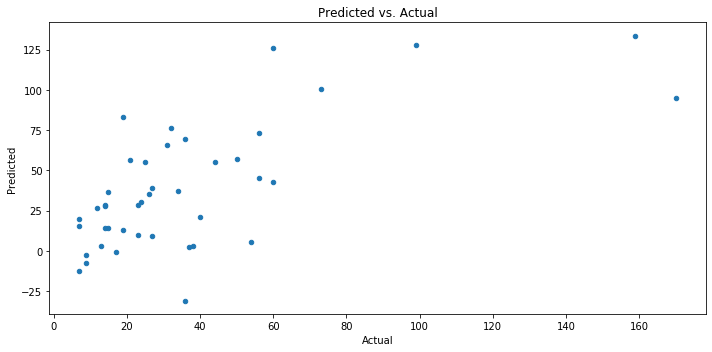

In [29]:
TheftOver_sklearn = linReg(X_train_3, y_train.iloc[:,[4]], X_test_3, y_test.iloc[:,[4]] )